# Hyperparameters

Consider the test function of two inputs $f(x_1, x_2) = e^{- (x_1/10)^2 - x_2^2}$. We can see that this function varies more quickly in the $x_1$ direction than the $x_2$ direction, especially if we look at the plot:

Text(0, 0.5, 'x2')

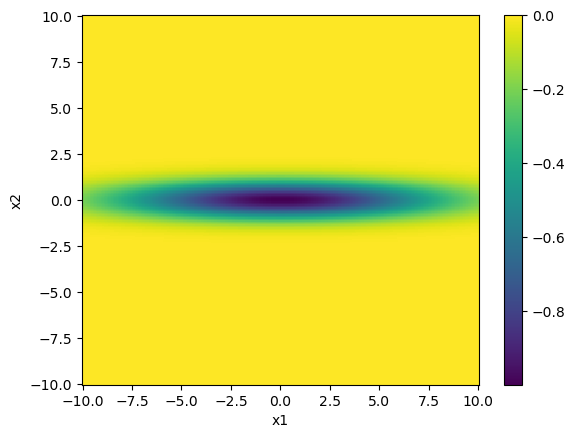

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

x1 = x2 = np.linspace(-10, 10, 256)
X1, X2 = np.meshgrid(x1, x2)

F = -np.exp(-((X1 / 8) ** 2)) * np.exp(-(X2**2))

plt.pcolormesh(x1, x2, F, shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

The optimization goes faster if our model understands how the function changes as we change the inputs in different ways. The way it picks up on this is by starting from a general model that could describe a lot of functions, and making it specific to this one by choosing the right hyperparameters. Our Bayesian agent is very good at this, and only needs a few samples to figure out what the function looks like:



Transient Scan ID: 1     Time: 2023-07-16 19:50:32
Persistent Unique Scan ID: '9c0b3dda-38b2-4340-bbf6-5b56c2d95fba'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
+-----------+------------+------------+------------+
generator list_scan ['9c0b3dda'] (scan num: 1)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


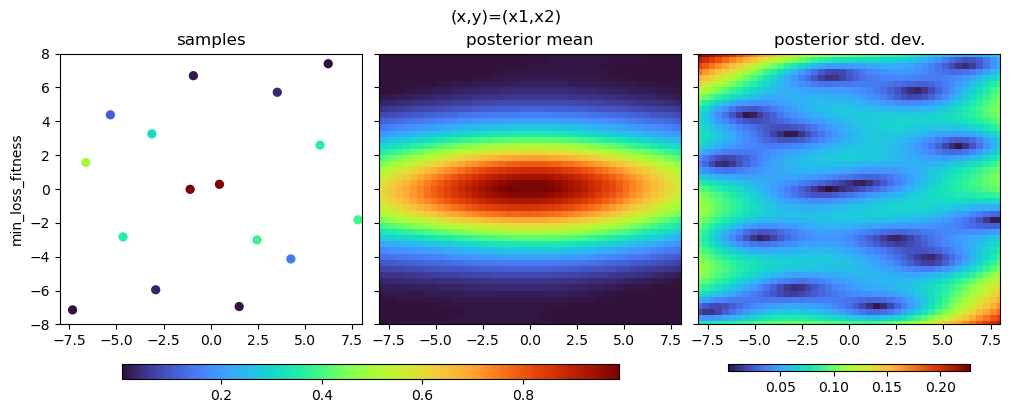

In [2]:
%run -i ../../../examples/prepare_bluesky.py # prepare the bluesky environment

import bloptools
from bloptools.tasks import Task

dofs = bloptools.devices.dummy_dofs(n=2)
bounds = [(-8, 8), (-8, 8)]

task = Task(key="loss", kind="min")


def digestion(db, uid):
    products = db[uid].table()

    for index, entry in products.iterrows():
        products.loc[index, "loss"] = -np.exp(-1e-2 * entry.x1**2) * np.exp(-1e-1 * entry.x2**2)

    return products


agent = bloptools.bayesian.Agent(
    active_dofs=dofs,
    passive_dofs=[],
    active_dof_bounds=bounds,
    tasks=[task],
    digestion=digestion,
    db=db,
)

RE(agent.initialize(acqf="qr", n_init=16))

agent.plot_tasks()

In [3]:
agent.tasks[0].regressor.covar_module.latent_dimensions

tensor([[[ 1.0552,  0.0294],
         [-0.0903,  3.2428]]], dtype=torch.float64,
       grad_fn=<UnsafeViewBackward0>)

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

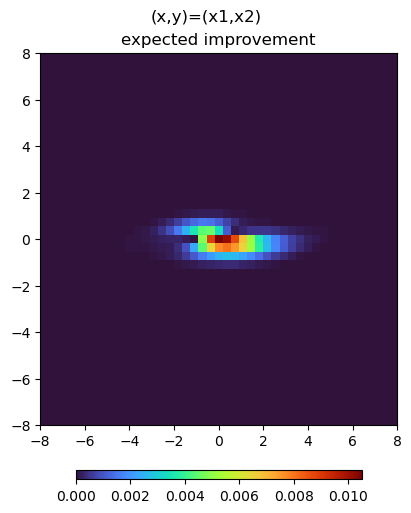

In [4]:
agent.plot_acquisition(strategy=["ei", "pi", "ucb"])



Transient Scan ID: 2     Time: 2023-07-16 19:50:38
Persistent Unique Scan ID: 'f0167155-8f5a-4c95-b151-7d0aaae27501'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:38.7 |      0.164 |     -0.077 |
+-----------+------------+------------+------------+
generator list_scan ['f0167155'] (scan num: 2)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 3     Time: 2023-07-16 19:50:42
Persistent Unique Scan ID: '28408197-f9e0-4a35-97c6-7d1eed2d14c9'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:42.1 |     -0.127 |      0.054 |
+-----------+------------+------------+------------+
generator list_scan ['28408197'] (scan num: 3)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 4     Time: 2023-07-16 19:50:45
Persistent Unique Scan ID: 'f248d04f-e781-4844-9d51-bd2e31757b8c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:45.5 |      0.266 |      0.033 |
+-----------+------------+------------+------------+
generator list_scan ['f248d04f'] (scan num: 4)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 5     Time: 2023-07-16 19:50:49
Persistent Unique Scan ID: '9f4ee419-3ca2-4bd2-a696-6e96d188e57d'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:49.6 |      1.064 |     -0.104 |
+-----------+------------+------------+------------+
generator list_scan ['9f4ee419'] (scan num: 5)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


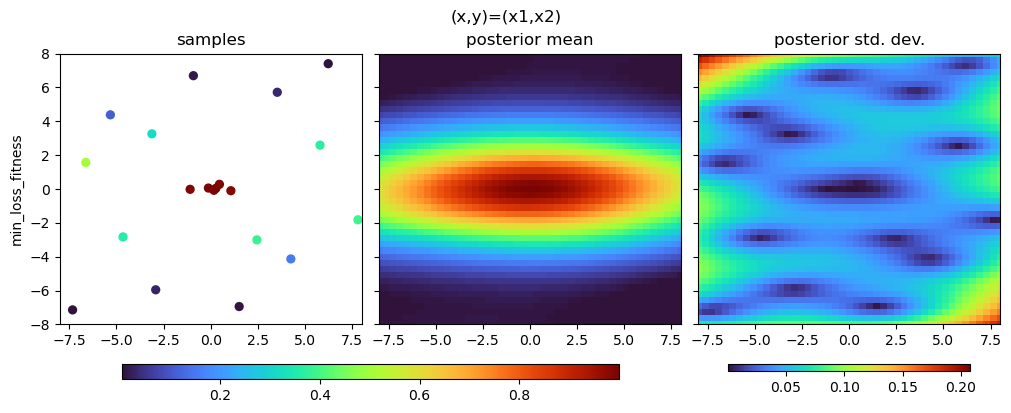

In [5]:
RE(agent.learn("ei", n_iter=4))
agent.plot_tasks()